In [1]:
# SPDX-License-Identifier: GPL-3.0-or-later

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import pandas as pd
import os
from scipy.stats import linregress

from matplotlib import pyplot as plt;
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5 
plt.rcParams["xtick.minor.width"] = 0.5 
plt.rcParams["ytick.major.width"] = 0.5 
plt.rcParams["ytick.minor.width"] = 0.5
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1


import conntility


In [4]:
savefig_cfg = {"transparent":True, "dpi": 300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}

# Load Compartment weights

In [5]:
import bluepysnap as bp
path_to_simulation = '../csd_paper/electrodes/'
s = bp.Simulation(path_to_simulation+'simulation_config.json') # Loads simulation object
population_name = 'S1nonbarrel_neurons'


In [6]:
c = s.circuit

In [7]:
hex0Ids = c.nodes.ids('hex0').get_ids()

In [8]:
n = c.nodes['S1nonbarrel_neurons']

## Checks number of somas that are within 10 um of a neuropixels contact

In [9]:
somaLocs = n.get(hex0Ids,properties=['x','y','z'])

In [5]:
neuropixelsLocs = pd.read_csv('~/Downloads/electrode_csv.csv').iloc[:,1:4]

In [6]:
import os

def count_files(path):
    count = 0
    for _, _, files in os.walk(path):
        count += len(files)
    return count

In [10]:
path_to_positions = '../csd_paper/electrodes/positions/'

In [11]:
numPositionFiles = count_files(path_to_positions)

In [14]:
filesPerFolder = 50
positions = pd.read_pickle(path_to_positions+'0/positions0.pkl')
for i in np.arange(1,numPositionFiles):
    folder = int(i/filesPerFolder)
    positions = pd.concat((positions,pd.read_pickle(path_to_positions+str(folder)+'/positions'+str(i)+'.pkl')),axis=1)

In [29]:
len(neuropixelsLocs)

384

In [33]:
NumBad = []
for n in range(len(neuropixelsLocs)):
    d = positions.values - neuropixelsLocs.iloc[n].values[:,np.newaxis]
    dis = np.linalg.norm(d,axis=0)
    NumBad.append(np.sum(dis>6))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [36]:
NumBad = np.array(NumBad)

In [40]:
NumBad = NumBad - 100236528

In [47]:
np.mean(NumBad)

-19.471354166666668

In [44]:
positions

id            0                                                           \
section           0            1            1            1            1    
0        4652.171846  4652.171846  4656.039573  4659.907301  4662.717122   
1       -1930.525524 -1930.525524 -1932.036757 -1933.547989 -1931.768027   
2       -1836.395782 -1836.395782 -1840.726702 -1845.057621 -1849.562551   

id                                                                        ...  \
section           1            1            2            2            2   ...   
0        4665.031698  4666.577364  4666.558924  4667.060199  4669.282444  ...   
1       -1928.942230 -1926.092358 -1926.096984 -1923.306976 -1921.315842  ...   
2       -1854.315929 -1859.358070 -1859.368768 -1864.653615 -1869.795049  ...   

id            211711                                                      \
section           48           48           48           48           49   
0        3826.874292  3815.761413  3807.723381  3790.565727  3879.484739   
1        -771.519013  -757.992465  -740.694084  -733.962018  -868.948318   
2       -2242.578888 -2231.511090 -2223.039783 -2216.068382 -2251.602882   

id                                                                        
section           49           49           49           49           49  
0        3793.323366  3927.039366  4067.762787  4208.486208  4349.209629  
1        -872.267981 -1006.556381 -1141.238675 -1275.920970 -1410.603264  
2       -2329.880819 -2378.370982 -2423.731741 -2469.092499 -2514.453258  

[3 rows x 100236528 columns]

In [37]:
distances = []
for s in np.array(somaLocs):
    distances.append(np.linalg.norm(s-neuropixelsLocs,axis=1))
distances = np.array(distances)

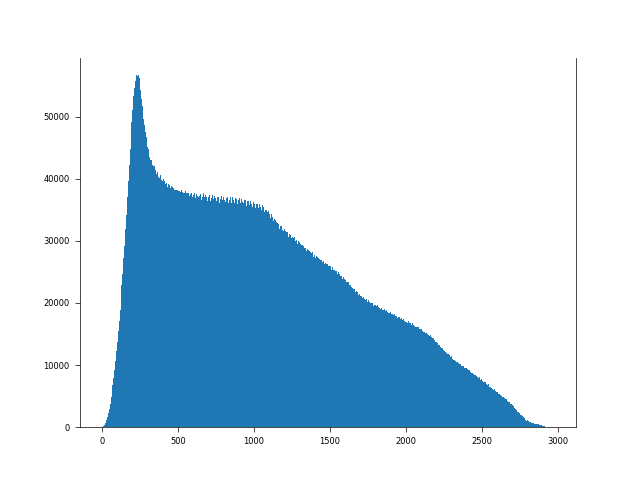

In [45]:
plt.figure()
plt.hist(distances.flatten(),bins=500)
plt.show()

In [57]:
np.sum(np.any(distances<10,axis=1))

87

In [6]:
import h5py

In [7]:
# Loads the weights file
coeffsFile = 'lfp_fullNeuropixels.h5'

coeffs = h5py.File(coeffsFile)

coeffsFileC = 'lfp_fullNeuropixels_test.h5'

coeffs_pointsource = h5py.File(coeffsFileC)


In [8]:
coeffs_pointsource['electrodes']['23']['size'][()]

5

In [9]:
# Node ids from weights file
allNodeIds = coeffs['S1nonbarrel_neurons']['node_ids']

offsets = [coeffs['S1nonbarrel_neurons']['offsets'][:][:-1],coeffs['S1nonbarrel_neurons']['offsets'][:][1:]]

#hex0Idx = np.where(np.isin(allNodeIds,hex0Ids))[0]

In [10]:
allNodeIds

<HDF5 dataset "node_ids": shape (30190,), type "<i8">

In [11]:
# Node ids from weights file
allNodeIdsC = coeffs_pointsource['S1nonbarrel_neurons']['node_ids']

offsetsC = [coeffs_pointsource['S1nonbarrel_neurons']['offsets'][:][:-1],coeffs_pointsource['S1nonbarrel_neurons']['offsets'][:][1:]]

#hex0Idx = np.where(np.isin(allNodeIds,hex0Ids))[0]

In [12]:
allValues = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][:][:,:-1]
allValuesC = coeffs_pointsource['electrodes']['S1nonbarrel_neurons']['scaling_factors'][:][:,:-1]


In [31]:
allValues.shape

(11285758, 51)

In [30]:
len(np.where(allValues[diffIdx]/allValuesC[diffIdx]>3)[0])

22

(array([131., 100.,  85.,  68.,  65.,  55.,  33.,  25.,  22.,  20.,  23.,
         12.,  25.,  21.,  10.,  12.,   7.,   8.,   6.,   8.,   5.,   3.,
          4.,   1.,   1.,   5.,   4.,   2.,   6.,   2.,   3.,   1.,   1.,
          1.,   1.,   1.,   2.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   2.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([1.00027318, 1.06307205, 1.12587091, 1.18866978, 1.25146865,
        1.31426751, 1.37706638, 1.43986524, 1.50266411, 1.56546298,
        1.62826184, 1.69106071, 1.75385957, 1.81665844, 1.87945731,
        1.94225617, 2.00505504, 2.0678539 , 2.13065277, 2.19345164,
        2.2562505 , 2.31904937, 2.38184824, 2.

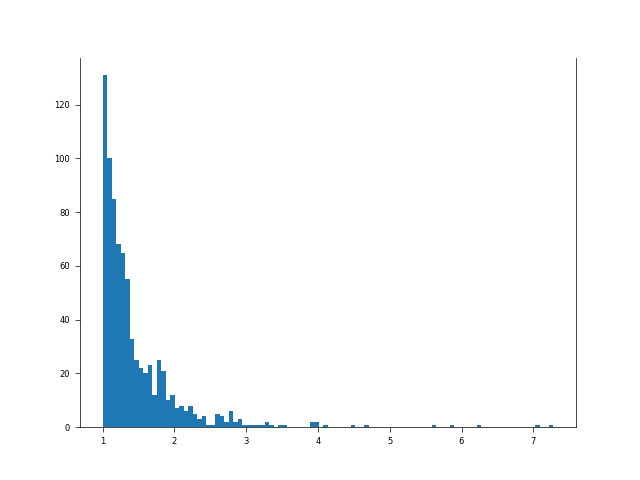

In [27]:
plt.figure()
plt.hist(allValues[diffIdx]/allValuesC[diffIdx],bins=100)

In [25]:
allValues[diffIdx]/allValuesC[diffIdx]

array([1.58962226, 1.96137857, 1.06796235, 1.13508146, 1.20244161,
       1.29738747, 1.07248983, 1.14483534, 1.94091727, 1.18387294,
       1.37039025, 1.21080313, 1.06150705, 1.20304703, 1.56074334,
       1.10292978, 1.0950938 , 2.20277949, 1.3207439 , 1.03044809,
       1.0972912 , 1.73318873, 1.2563538 , 1.44947779, 1.20398088,
       1.637092  , 1.58824501, 1.44548126, 1.11699976, 1.02671009,
       1.09688814, 1.11106113, 1.06445198, 1.29965176, 1.33402907,
       2.03696757, 1.2015302 , 1.73729715, 1.86590309, 1.86982956,
       1.51977954, 1.08936519, 1.03217321, 1.0362494 , 1.13721107,
       1.41383638, 1.9969392 , 1.90109742, 1.23643184, 2.23455236,
       1.12421594, 2.65645351, 1.39518197, 2.92000451, 1.27090707,
       2.09436131, 1.4139875 , 1.067124  , 1.99702787, 2.0379969 ,
       4.68406249, 1.21013403, 1.79047075, 1.00422948, 1.58407796,
       1.97939063, 1.34560453, 1.1016096 , 1.31697081, 2.40880784,
       2.63204615, 1.53289192, 1.26323325, 1.1804982 , 1.30404

In [24]:
allValuesC[diffIdx]

array([5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
       5.74566582e-05, 5.74566582e-05, 5.74566582e-05, 5.74566582e-05,
      

In [19]:
diffIdx = np.where(allValues != allValuesC)

In [24]:
# Gets compartment weights for the selected nodes (shifted such that the minimum weight for each neuron is 0)

scaleFac = []

for i in range(len(offsets[0])):
    
    sfl = coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][offsets[0][i]:offsets[1][i]][:,:-1]
    sfl -= np.min(sfl,axis=0)


    scaleFac.append( sfl )

scaleFacPoint = []

for i in range(len(offsets[0])):
    
    sfl = coeffs_pointsource['electrodes']['S1nonbarrel_neurons']['scaling_factors'][offsets[0][i]:offsets[1][i]][:,:-1]
    sfl -= np.min(sfl,axis=0)


    scaleFacPoint.append( sfl )




In [25]:
scaleFacFlat = np.array([item for sublist in scaleFac for item in sublist])
scaleFacPointFlat = np.array([item for sublist in scaleFacPoint for item in sublist])

In [15]:
coeffs['electrodes']['S1nonbarrel_neurons']['scaling_factors'][:]

array([[1.48267594e-07, 1.51392886e-07, 1.54652699e-07, ...,
        1.01649217e-05, 4.43452637e-06, 1.00000000e+00],
       [1.48317230e-07, 1.51444600e-07, 1.54706623e-07, ...,
        9.49773722e-06, 4.34744911e-06, 1.00000000e+00],
       [1.48415582e-07, 1.51547048e-07, 1.54813428e-07, ...,
        8.28888500e-06, 4.16383360e-06, 1.00000000e+00],
       ...,
       [4.11928476e-07, 4.35494119e-07, 4.61709419e-07, ...,
        2.17781842e-07, 2.11460854e-07, 1.00000000e+00],
       [4.83917776e-07, 5.13584749e-07, 5.46286761e-07, ...,
        1.94653918e-07, 1.89616934e-07, 1.00000000e+00],
       [5.25833585e-07, 5.52243518e-07, 5.79273513e-07, ...,
        1.74956456e-07, 1.70917585e-07, 1.00000000e+00]])

In [19]:
coeffs_pointsource['electrodes']['S1nonbarrel_neurons']['scaling_factors']

<HDF5 dataset "scaling_factors": shape (11285758, 52), type "<f8">

In [25]:
np.where(scaleFacPointFlat==1)

(array([], dtype=int64), array([], dtype=int64))

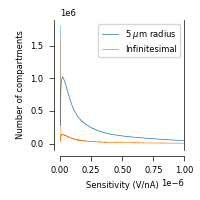

In [21]:
hist,bins = np.histogram(scaleFacFlat,bins=int(1e6))
histC,binsC = np.histogram(scaleFacPointFlat,bins=int(1e6))
plt.figure(figsize=(2,2))
ax = plt.gca()
plt.plot(bins[1:],hist)
plt.plot(binsC[1:],histC)

ax.legend("", frameon=False)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))
ax.set_xlabel('Sensitivity (V/nA)')
ax.set_ylabel('Number of compartments')

plt.legend(['5 $\mu$m radius','Infinitesimal'])


plt.xlim([0,1e-6])
plt.tight_layout()


plt.savefig('compartment_weight_histograms.png',dpi=600)

In [26]:
plt.figure(figsize=(2,2))
ax = plt.gca()
plt.plot(scaleFacFlat,scaleFacPointFlat,'o')
plt.plot([0,6e-5],[0,6e-5],'k')

ax.legend("", frameon=False)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))
ax.set_xlabel('Sensitivity for\n5 $\mu$m electrodes (V/nA)')
ax.set_ylabel('Sensitivity for\ninfinitesimal electrodes (V/nA)')

plt.tight_layout()

plt.savefig('sensitivity_scatter_plot.png',dpi=600)

/tmp/ipykernel_508284/2132711279.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_508284/2132711279.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('sensitivity_scatter_plot.png',dpi=600)


KeyboardInterrupt: 

/home/joseph-tharayil/Documents/bluebrainStuff/bbpEnv/lib/python3.11/site-packages/ipympl/backend_nbagg.py:335: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


Error in callback <function flush_figures at 0x728d209a9260> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [39]:
from scipy.stats import linregress
reg = linregress(scaleFacFlat,scaleFacPointFlat)

In [40]:
reg

LinregressResult(slope=1.0158702173438134, intercept=-6.922534510260422e-09, rvalue=0.9936400811589363, pvalue=0.0, stderr=3.426833179848138e-05, intercept_stderr=2.7081976859758525e-11)

In [41]:
diffs = (scaleFacFlat-scaleFacPointFlat)

In [42]:
maxima = []
for s in scaleFac:
    maxima.append(np.max(s))
maxima = np.array(maxima)
meanMax = np.mean(maxima)

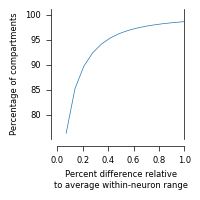

In [46]:
h, b = np.histogram(np.abs(diffs/meanMax),bins=100000)
plt.figure(figsize=(2,2))
ax = plt.gca()

plt.plot(b[1:]*1e2,np.cumsum(h)/np.sum(h)*100)

ax.legend("", frameon=False)
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))
ax.set_xlabel('Percent difference relative\nto average within-neuron range')
ax.set_ylabel('Percentage of compartments')

plt.xlim([0,1])
plt.tight_layout()

plt.savefig('cumulative_histogram.png',dpi=600)